# Problem2
## 20M10293 Daisuke Kikuta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def soft_thresholding(x, q):
    if   x > q:
        return x - q
    elif x < -q:
        return x + q
    else:
        return 0

def grad(A,w,mu):
    return 2*np.dot((w-mu), A.T)

In [3]:
itr = 300

A   = np.array([[3., 0.5],
                [0.5, 1.]])

mu  = np.array([[1., 2.]])

hp_list = {"lamda=2" : 2, 
           "lamda=4" : 4, 
           "lamda=6" : 6}

L = 4 + 3*np.sqrt(3) # Lipsitz constant

w0_history_tmp = []
w1_history_tmp = []
w0_history = {}
w1_history = {}

for k, hp in hp_list.items():
    w = np.array([[3, -1]])
    for t in range(1, itr):
        w = w - 1/L*grad(A, w, mu)

        w[0, 0] = soft_thresholding(w[0, 0], hp/L)
        w[0, 1] = soft_thresholding(w[0, 1], hp/L)

        w0_history_tmp.append(w[0, 0])
        w1_history_tmp.append(w[0, 1])

    print(k, "optimal weights: ", w)
    w0_history[k]  = w0_history_tmp
    w1_history[k]  = w1_history_tmp
    w0_history_tmp = []
    w1_history_tmp = []

lamda=2 optimal weights:  [[0.81818182 1.09090909]]
lamda=4 optimal weights:  [[0.63636364 0.18181818]]
lamda=6 optimal weights:  [[0.33333333 0.        ]]


Text(0, 0.5, '|| w - w_opt ||')

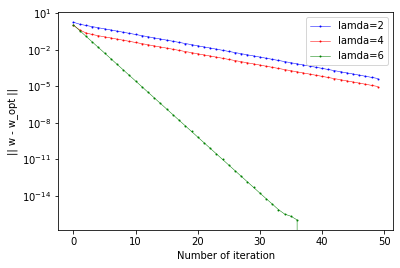

In [4]:
show_itr = 50

color = ["bo-",
         "ro-",
         "go-"]

c = 0
for k, hp in hp_list.items():
    w0_opt = np.abs(w0_history[k][-1])
    w1_opt = np.abs(w1_history[k][-1])

    l2_err = np.sqrt((w0_history[k][:show_itr] - w0_opt)**2 + 
                     (w1_history[k][:show_itr] - w1_opt)**2)

    plt.plot(l2_err[:itr-1], color[c], linewidth=0.5, markersize=1, label=k)
    plt.legend()
    c += 1

plt.yscale("log")
plt.xlabel("Number of iteration")
plt.ylabel("|| w - w_opt ||")